Alex Germick Github link: https://github.com/Germick/UTD-2018/tree/master

1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Batting.csv',header=0,nrows=102817)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102816 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102816 non-null float64
SB           102816 non-null float64
CS           102816 non-null float64
BB           102816 non-null int64
SO           102816 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GIDP         102816 non-null

Fill NaN Values for stats not captured

In [200]:
df=df.fillna(value=0)

2)	Print out the dimensions and info about the dataframe you just created
Create Player/Year ID and Additional Stat Columns (PA, OBP, BA, SORate, HRRate, etc.)

In [201]:
##Player/Year ID
df["PYID"]=df["playerID"] + df["yearID"].map(str)
##Plate Apperances
df["PA"]=df["AB"]+df["BB"]+df["IBB"]+df["HBP"]+df["SH"]+df["SF"]
##On Base Percentage
df["OBP"]=(df["H"]+df["BB"]+df["HBP"])/df["PA"]
##Batting Average
df["BA"]=df["H"]/df["AB"]
#Extras
df["BABIP"]=(df["H"]-df["HR"])/(df["AB"]-df["HR"]-df["SO"]+df["SF"])
df["TB"]=(df["H"]-df["2B"]-df["3B"]-df["HR"])+(df["2B"]*2)+(df["3B"]*3)+(df["HR"]*4)
df["SLG"]=df["TB"]/df["AB"]
df["SORate"]=df["SO"]/df["PA"]
df["HRRate"]=df["HR"]/df["PA"]
df['AGE']=df["yearID"] - df["birthYear"]
df=df.fillna(value=0)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 35 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102816 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102816 non-null float64
SB           102816 non-null float64
CS           102816 non-null float64
BB           102816 non-null int64
SO           102816 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GIDP         102816 non-null

(102816, 35)

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [202]:
df3 = df.pivot_table(values="HR",index=["playerID"], columns="yearID")
df3 = df3.fillna(value=0)
df3['MaxHR'] = df3.max(axis=1)
len(df3[df3['MaxHR']>39])

142

4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [203]:
df4 = df.pivot_table(values="HR",index="playerID",aggfunc=np.sum)
df4=df4[df4["HR"]>599]
df4

,HR
playerID,
aaronha01,755
bondsba01,762
griffke02,630
mayswi01,660
rodrial01,696
ruthba01,714
sosasa01,609
thomeji01,612


5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [204]:
df5 = df.pivot_table(values=["2B","3B","H","HR"],index="PYID", aggfunc=np.sum)
df5 = df5[df5['2B']>39]
df5 = df5[df5['3B']>9]
df5 = df5[df5['H']>200]
df5 = df5[df5['HR']>30]
len(df5)

13

6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [205]:
df6 = df.pivot_table(values="SB",index=["playerID"], columns="yearID")
df6 = df6.fillna(value=0)
df6['MaxSB'] = df6.max(axis=1)
df6[df6['MaxSB']>100]

yearID,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,MaxSB
playerID,,,,,,,,,,,,,,,,,,,,,
brocklo01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
brownpe01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0
brownto01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0
colemvi01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0
comisch01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
fogarji01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0
hamilbi01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0
henderi01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0
lathaar01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0


7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [206]:
df7=df[df['yearID']>1959]
df7=df7[df7['yearID']<1970]
df7 = df7.pivot_table(values="HR",index="playerID",aggfunc=np.sum)
df7=df7[df7['HR']>199]
df7


,HR
playerID,
aaronha01,375
allisbo01,225
bankser01,269
cashno01,278
cepedor01,254
colavro01,245
howarfr01,288
kalinal01,210
killeha01,393


8)	Who has hit the most HRs in history? (Dataframe)

In [207]:
df8 = df.pivot_table(values="HR",index="playerID",aggfunc=np.sum)
df8[df8["HR"]==df8["HR"].max()]
                     

,HR
playerID,
bondsba01,762


9)	Who had the most hits in the 1970s? (Dataframe)

In [208]:
df9=df[df['yearID']>1969]
df9=df9[df9['yearID']<1980]
df9 = df9.pivot_table(values="H",index="playerID",aggfunc=np.sum)
df9[df9["H"]==df9["H"].max()]

,H
playerID,
rosepe01,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [209]:
df10 = df[df["yearID"]==1970]
df10 = df10.pivot_table(values=["H","BB","HBP","PA"],index="playerID",aggfunc=np.sum)
df10 = df10[df10["PA"]>499]
df10["OBP"] = (df10["H"]+df10["BB"]+df10["HBP"])/df10["PA"]


df10 = df10.sort_values(by='OBP',ascending= False)
df10.head(5)

,BB,H,HBP,PA,OBP
playerID,,,,,
cartyri01,77,175,2.0,566.0,0.448763
yastrca01,128,186,1.0,709.0,0.444288
dietzdi01,109,148,3.0,622.0,0.418006
mccovwi01,137,143,3.0,678.0,0.417404
hickmji02,93,162,1.0,621.0,0.412238


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [210]:
df11 = df[df["yearID"]==2013]
df11 = df11.pivot_table(values=["H","AB","PA"],index="playerID", aggfunc=np.sum)
df11 = df11[df11["PA"]>299]
df11["BA"] = df11["H"]/df11["AB"]

df11 = df11.sort_values(by='BA',ascending= False)
df11.head(8)

,AB,H,PA,BA
playerID,,,,
cabremi01,555,193,671.0,0.347748
ramirha01,304,105,339.0,0.345395
cuddymi01,489,162,545.0,0.331288
mauerjo01,445,144,515.0,0.323596
troutmi01,589,190,726.0,0.322581
johnsch05,514,165,552.0,0.321012
freemfr01,551,176,639.0,0.319419
puigya01,382,122,438.0,0.319372


12)	Leaders in hits from 1940 up to and including 1949. Top ten players and sorted by most hits. (Dataframe)

In [211]:
df12 = df[df["yearID"]>1939]
df12 = df12[df12["yearID"]<1950]
df12 = df12.pivot_table(values="H",index="playerID",aggfunc=np.sum)
df12 = df12.sort_values(by='H',ascending= False)
df12.head(10)

,H
playerID,
boudrlo01,1578
elliobo01,1563
walkedi02,1512
musiast01,1432
doerrbo01,1407
holmeto01,1402
applilu01,1376
nichobi01,1328
marioma01,1310


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [259]:
df13 = df.pivot_table(values='H', index='yearID', columns='playerID', aggfunc=np.sum, fill_value=0)
df13['leader']=df13.max(1)
df13


playerID,aardsda01,aaronha01,aaronto01,aasedo01,abadan01,abadfe01,abadijo01,abbated01,abbeybe01,abbeych01,...,zuletju01,zumayjo01,zuninmi01,zupcibo01,zupofr01,zuvelpa01,zuverge01,zwilldu01,zychto01,leader
yearID,,,,,,,,,,,,,,,,,,,,,
1871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
1872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99
1873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,137
1874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123
1875,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,143
1876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,138
1877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,103
1878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146


14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [34]:
df14 = df.pivot_table(values="G",index="playerID",aggfunc=np.sum)
df14 = df14.sort_values(by='G',ascending= False)
df14.head(5)

,G
playerID,
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [46]:
df15 = df.pivot_table(values=['H','HR'],index="playerID", aggfunc=np.sum)
df15 = df15[df15['H']>2999]
df15 = df15[df15['HR']>499]
len(df15)

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [57]:
df16 = df.pivot_table(values='HR', index='yearID', aggfunc=np.sum)
df16 = df16.filter(like='1988', axis=0)
df16.sum()

HR    3180
dtype: int64

17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [61]:
df17 = df[df['playerID']=="boggswa01"]
df17 = df17.pivot_table(values=['H','AB','PA'], index='yearID', aggfunc=np.sum)
df17["BA"] = df17["H"]/df17["AB"]
df17 = df17[df17['PA']>499]
df17 = df17.sort_values(by='BA',ascending= False)
df17.head(3)


,AB,H,PA,BA
yearID,,,,
1985,653,240,763.0,0.367534
1988,584,214,737.0,0.366438
1987,551,200,686.0,0.362976


18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [64]:
df18 = df[df["yearID"]>1995]
df18 = df18.pivot_table(values=['PA','H','BB','HBP'], index='playerID', aggfunc=np.sum)
df18 = df18[df18["PA"]>399]
df18["OBP"] = (df18["H"]+df18["BB"]+df18["HBP"])/df18["PA"]
df18 = df18.sort_values(by="OBP", ascending =False)
df18

,BB,H,HBP,PA,OBP
playerID,,,,,
bondsba01,1627,1499,73.0,7060.0,0.453116
walkela01,600,1343,97.0,4840.0,0.421488
martied01,851,1379,57.0,5472.0,0.417946
vottojo01,862,1407,39.0,5546.0,0.416156
mcgwima01,644,705,35.0,3328.0,0.415865
bagweje01,1036,1543,90.0,6562.0,0.406736
heltoto01,1335,2519,57.0,9635.0,0.405916
ramirma02,1210,2338,104.0,9018.0,0.404968
sheffga01,1177,1915,100.0,7968.0,0.400602


19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [67]:
df19 = df[(df['yearID'] == 1922) | (df['yearID'] == 1925 ) | (df['yearID'] == 1926 ) | (df['yearID'] == 1928 )]
df19 = df19.pivot_table(values="3B",index="playerID", aggfunc=np.sum)
df19 = df19.sort_values(by="3B", ascending =False)
df19.head(1)

,3B
playerID,
walkecu01,59


20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [80]:
df20 = df.pivot_table(values=["HR","SB"], index=["PYID","playerID"], aggfunc=np.sum)
df20 = df20[(df20["HR"]>30) & (df20["SB"]>30)]
len(df20.groupby(['playerID']).agg(['count']))

33

21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [82]:
df21 = df[(df['yearID']==1986) & (df['PA']>399)]
df21 = df21.sort_values(by="OBP",ascending = False)
df21.head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,PYID,PA,OBP,BA,BABIP,TB,SLG,SORate,HRRate,AGE
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,boggswa011986,707.0,0.441301,0.356897,0.37406,282,0.486207,0.062235,0.011315,28


22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [83]:
df22 = df[(df['yearID']==1997) & (df['PA']>399) & (df['lgID']=="NL")]
df22 = df22.sort_values(by="OBP",ascending = False)
df22.head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,PYID,PA,OBP,BA,BABIP,TB,SLG,SORate,HRRate,AGE
76562,walkela01,Larry,Walker,1966,1997,1,COL,NL,153,568,...,walkela011997,678.0,0.442478,0.366197,0.367206,409,0.72007,0.132743,0.072271,31


23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [90]:
df23 = df[(df['yearID']==2012)]
df23 = df23.pivot_table(values=['HR','PA'], index="playerID", aggfunc=np.sum)
HRmean = df23["HR"].mean()
df23 = df23[(df23['PA']>499) & (df23['HR']>HRmean)]
df23

,HR,PA
playerID,,
ackledu01,12,675.0
alonsyo01,9,628.0
altuvjo01,7,630.0
alvarpe01,30,592.0
aokino01,10,589.0
avilemi01,13,546.0
aybarer01,8,554.0
barneda01,7,589.0
beckhgo01,16,582.0


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [115]:
df24 = df.pivot_table(values="HR",index=["PYID","AGE"], aggfunc=np.sum)
df24 = df24[df24["HR"]>49]
df24 = df24.reset_index()
df24 = df24.sort_values(by="AGE")
df24.head(1)

,PYID,AGE,HR
6,fieldpr012007,23,50


25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [252]:
df25 = df[df['AGE']<100]
df25 = df25.pivot_table(values="HR",index=["playerID"], columns="AGE", aggfunc=np.sum, fill_value=0)
df25 = df25.cumsum(1)
df25["TotHR"] = df25.max(1)
df25=df25[df25["TotHR"]>299]
df25 = df25.sort_values(by="TotHR",ascending=False)
df25.head(5)


AGE,16,17,18,19,20,21,22,23,24,25,...,48,49,50,51,53,54,55,57,59,TotHR
playerID,,,,,,,,,,,,,,,,,,,,,
bondsba01,0,0,0,0,0,0,16,41,65,84,...,762,762,762,762,762,762,762,762,762,762
aaronha01,0,0,0,0,13,40,66,110,140,179,...,755,755,755,755,755,755,755,755,755,755
ruthba01,0,0,0,0,4,7,9,20,49,103,...,714,714,714,714,714,714,714,714,714,714
rodrial01,0,0,0,0,5,41,64,106,148,189,...,696,696,696,696,696,696,696,696,696,696
mayswi01,0,0,0,0,20,24,24,65,116,152,...,660,660,660,660,660,660,660,660,660,660


#Bonus: Graph total HRs per season using bar graph

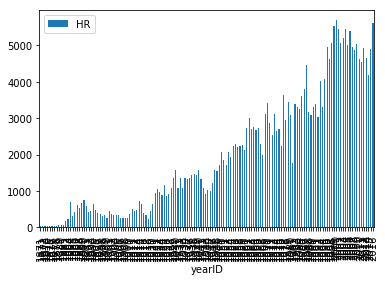

In [192]:
df26 = df.pivot_table(values="HR",index="yearID",aggfunc=np.sum)
df26.plot.bar()

#Bonus: Using a line graph please graph the average HRs per AB (think about this) per season

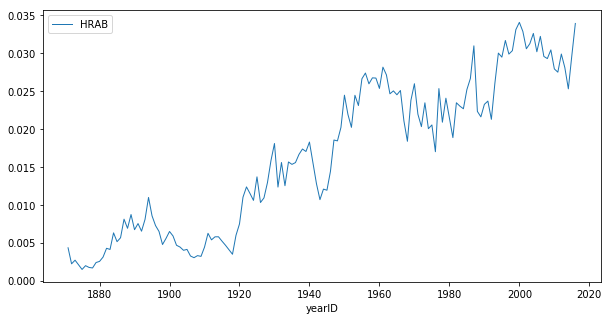

In [215]:
df27 = df.pivot_table(values=["HR","AB"], index='yearID', aggfunc=np.sum )
df27['HRAB'] = df27["HR"]/df27["AB"]
df27.plot.line(x=df27.index,y='HRAB',figsize=(10,5),lw=1)